In [1]:
# Importing modules
import torch 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn, optim
import matplotlib.pyplot as plt

In [2]:
# Image folder
train_dir = "train/"

# Transformation
transformation = transforms.Compose(
    [transforms.Resize(28), 
     transforms.Grayscale(), 
     transforms.ToTensor()]
)

# Dataset
train_datasets = datasets.ImageFolder(train_dir, transformation)

# Dataloader
train_dataloader = DataLoader(train_datasets, batch_size=64)

In [3]:
# AutoEncoder
class AutoEncoder(nn.Module):

    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Neurons in bottleneck layer
        self.n_bottleneck = 8

        # Encoder Block
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, self.n_bottleneck),
            nn.ReLU()
        )

        # Decoder Block
        self.decoder = nn.Sequential(
            nn.Linear(self.n_bottleneck, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        encoded_x = self.encoder(x)
        decoded_x = self.decoder(encoded_x)
        return encoded_x, decoded_x   

In [4]:
# Device
device = torch.device("cpu")

# Model
model = AutoEncoder()
model = model.to(device)

# Optimizer 
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Loss function
criterion = nn.MSELoss()

In [5]:
# Training loop
for epoch in range(10):
    epoch_loss = 0
    model.train()
    for batch in train_dataloader:
        optimizer.zero_grad()
        X, _ = batch
        X = X.to(device)
        X_encoded, X_decoded = model(X)
        loss = criterion(X_decoded, torch.flatten(X, start_dim=1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch: {epoch+1} | Loss: {epoch_loss/len(train_dataloader)}")

Epoch: 1 | Loss: 0.031240821229638876
Epoch: 2 | Loss: 0.011958958615583402
Epoch: 3 | Loss: 0.011053035656611124
Epoch: 4 | Loss: 0.010864946473803785
Epoch: 5 | Loss: 0.010855431220045796
Epoch: 6 | Loss: 0.010860117531760975
Epoch: 7 | Loss: 0.010826865383596332
Epoch: 8 | Loss: 0.010787761080320235
Epoch: 9 | Loss: 0.010724869798179026
Epoch: 10 | Loss: 0.01070234100161879


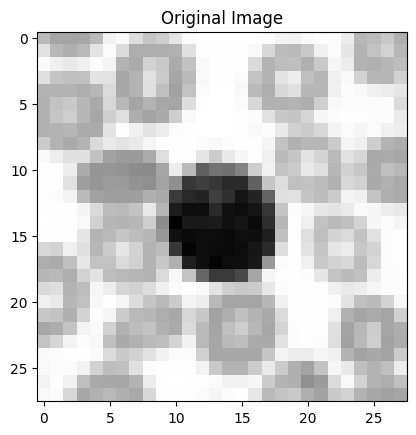

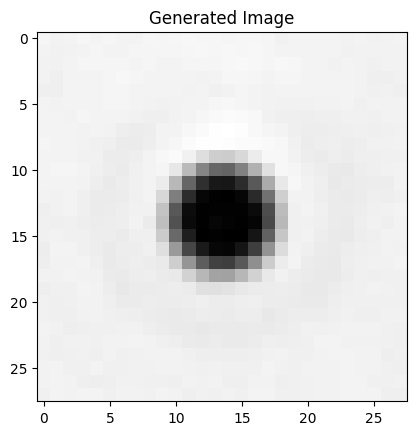

Encoded tensor: tensor([[0.0000, 0.0000, 0.0000, 2.9831, 0.0000, 0.0000, 0.0000, 3.1968]])


In [6]:
# Function for plotting image
def plot_tensor(tensor, title):
    tensor = tensor.reshape(28, 28)
    plt.imshow(tensor.detach().numpy(), cmap='gray')
    plt.title(title)
    plt.show()

# Image folder
test_dir = "test/"

# Test data
test_datasets = datasets.ImageFolder(test_dir, transformation)
X_test = test_datasets[0][0].to(device)

# Testing
model.eval()
encoded, decoded = model(X_test)

# Plotting output
plot_tensor(X_test, "Original Image")
plot_tensor(decoded, "Generated Image")
print(f"Encoded tensor: {encoded.detach()}")